In [ ]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


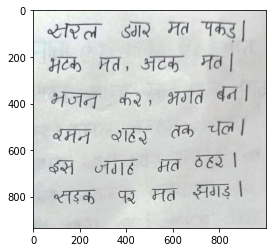

In [ ]:
#scaling 
img = cv2.imread('/content/hindi.jpeg')
# img = cv2.imread('/content/sample_data/aa.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, c = img.shape

if w > 1000:
    
    new_w = 1000
    ar = w/h
    new_h = int(new_w/ar)
    
    img = cv2.resize(img, (new_w, new_h), interpolation = cv2.INTER_AREA)
plt.imshow(img);

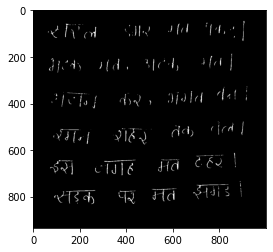

In [ ]:
#thresholding
def thresholding(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img_gray,80,255,cv2.THRESH_BINARY_INV)
    plt.imshow(thresh, cmap='gray')
    return thresh

thresh_img = thresholding(img);

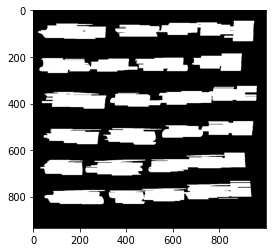

In [ ]:
#dilation
kernel = np.ones((3,85), np.uint8)
dilated = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated, cmap='gray');

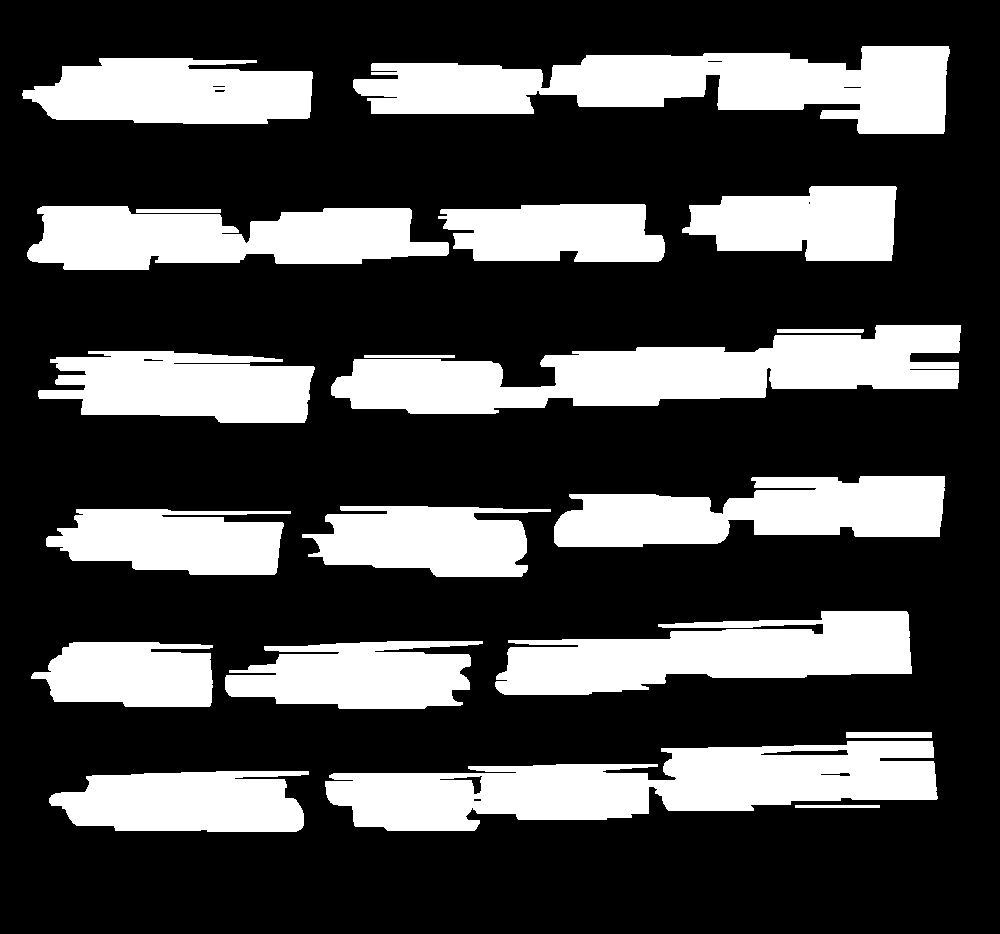

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  87  87  88  89  89  89  88 174
 174 259 291 290 386 406 471 456 470 582 563 595 636 638 638 727 743 790
 817 818 818 776 776 778 778 822 825 825 825 829 829 829 838 834 858 856
 857 855 863 863 858 810 786 753 766 757 757 753 749 747 690 689 687 603
 602 601 553 552 551 551 388 387 385 384 381 298 221 221 221 172  88  88
  88  88  88  88  88  87  86  85   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  85  87  88  88  87  87  87  86  86  86 174 174
 174 174 174 174 173 173 260 331 417 419 508 675 677 678 720 635 710 712
 723 724 723 714 714 741 742 743 743 743 756 763 766 762 737 738 738 736
 756 746 747 747 749 750 746 749 791 793 798 799 80

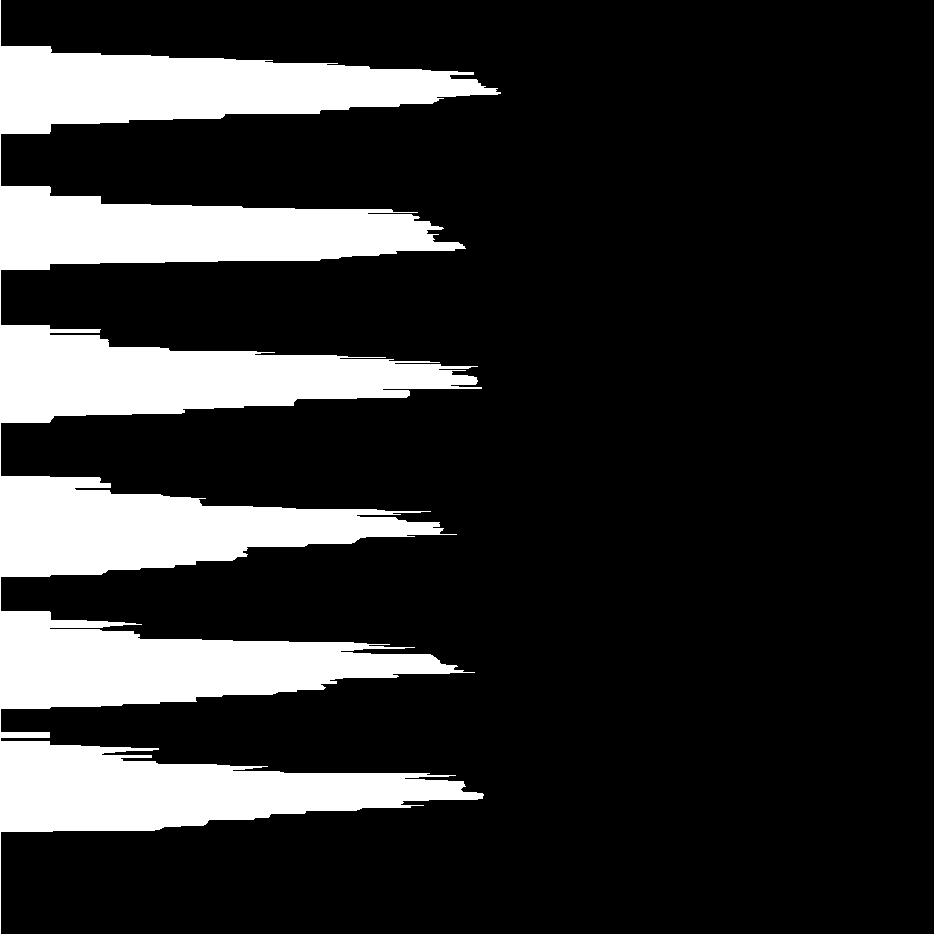

In [ ]:
import cv2
import numpy as np

# Load as greyscale
im = dilated
# im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, = im.shape

if w > 1000:
    
    new_w = 1000
    ar = w/h
    new_h = int(new_w/ar)
    
    im = cv2.resize(im, (new_w, new_h), interpolation = cv2.INTER_AREA)
# im = 255 - im
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im=cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)
cv2_imshow(im)

# Invert


# Calculate horizontal projection
proj = np.sum(im,1)
proj=proj//255
print(proj)

# Create output image same height as text, 500 px wide
m = np.max(proj)
abc=np.mean(proj)
w = 500
result = np.zeros((proj.shape[0],proj.shape[0]))

# Draw a line for each row
for row in range(im.shape[0]):
   cv2.line(result, (0,row), (int(proj[row]*w/m),row), (255,255,255), 1)

# Save result
cv2_imshow(result)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  87  87  88  89  89  89  88 174
 174 259 291 290 386 406 471 456 470 582 563 595 636 638 638 727 743 790
 817 818 818 776 776 778 778 822 825 825 825 829 829 829 838 834 858 856
 857 855 863 863 858 810 786 753 766 757 757 753 749 747 690 689 687 603
 602 601 553 552 551 551 388 387 385 384 381 298 221 221 221 172  88  88
  88  88  88  88  88  87  86  85   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  85  87  88  88  87  87  87  86  86  86 174 174
 174 174 174 174 173 173 260 331 417 419 508 675 677 678 720 635 710 712
 723 724 723 714 714 741 742 743 743 743 756 763 766 762 737 738 738 736
 756 746 747 747 749 750 746 749 791 793 798 799 80

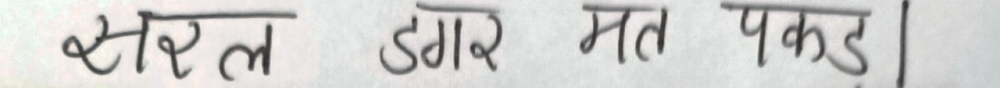

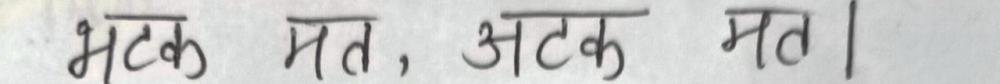

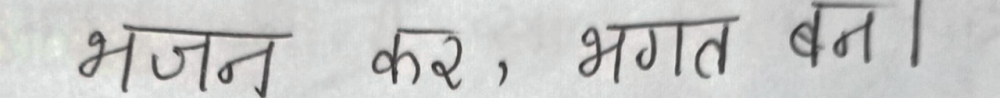

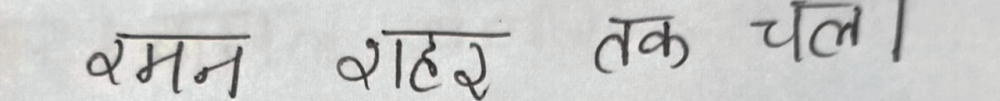

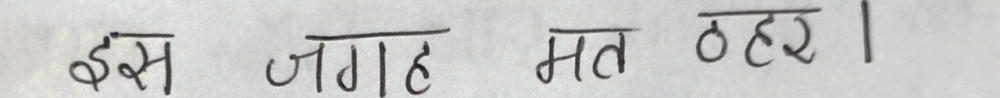

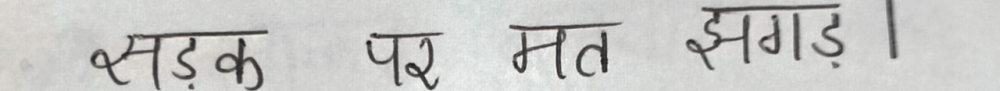

In [ ]:
img2 = img.copy()
# cv2_imshow(img2)

print(proj)
def l2(z,proj):
  x,y=0,0
  flag=0
  for i in range(1,len(proj)):
    # print(proj[i])
    if(proj[i]>0 and flag==0):
        # print(x)
        flag=1
        x=i
    if(proj[i]<1 and x!=0):
        y=i
        flag=0
        # print(x,y)
        if((y-x)>3):
          z.append(img2[x:y,::])
        x=y
# def l1(z):
#   for ctr in sorted_contours_lines:
      
#       x,y,w,h = cv2.boundingRect(ctr)
#       if(h<10):
#         continue
#       cv2.rectangle(img2, (x,y), (x+w, y+h), (40, 100, 250), 0)
#       roi = img2[y:y+h,x:x+w]
#       # break
#       # cv2_imshow(roi)
#       # roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
#       z.append(roi)
l=[]
a=l2(l,proj)
# plt.imshow(img2);
# cv2_imshow(x)
print(len(l))
for i in l:
  cv2_imshow(i)
  print('')

In [ ]:
(contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours_lines = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[0]) # (x, y, w, h)

In [ ]:
def borders(here_img, thresh, bthresh=0.092):
    shape = here_img.shape
    #check = int(115 * size[0] / 600)
    #check = int(55 * size[0] / 600)
    check= int(bthresh*shape[0])
    image = here_img[:]
    top, bottom = 0, shape[0] - 1
    #plt.imshow(image)
    #plt.show()
    

    #find the background color for empty column
    bg = np.repeat(thresh, shape[1])
    count = 0
    for row in range(1, shape[0]):
        if  (np.equal(bg, image[row]).any()) == True:
            #print(count)
            count += 1
        else:
            count = 0
        if count >= check:
            top = row - check
            break
    

    bg = np.repeat(thresh, shape[1])
    count = 0
    rows = np.arange(1, shape[0])
    #print(rows)
    for row in rows[::-1]:
        if  (np.equal(bg, image[row]).any()) == True:
            count += 1
        else:
            count = 0
        if count >= check:
            bottom = row + count
            break

    d1 = (top - 2) >= 0 
    d2 = (bottom + 2) < shape[0]
    d = d1 and d2
    if(d):
        b = 2
    else:
        b = 0
    
    return (top, bottom, b)

In [ ]:
def preprocess(bgr_img):#gray image   
    blur = cv2.GaussianBlur(bgr_img,(5,5),0)
    ret,th_img = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) #converts black to white and inverse

    rows, cols = th_img.shape
    # if(min(rows,cols)<5):
    #   return 
    bg_test = np.array([th_img[i][i] for i in range(3)])
    if bg_test.all() == 0:
        text_color = 255
    else:
        text_color = 0
    
    tb = borders(th_img, text_color)
    lr = borders(th_img.T, text_color)
    dummy = int(np.average((tb[2], lr[2]))) + 2
    template = th_img[tb[0]+dummy:tb[1]-dummy, lr[0]+dummy:lr[1]-dummy]
    
    # plt.imshow(template)
    # plt.show()
    return (template, tb, lr)

In [ ]:
def segmentation(bordered, thresh=255, min_seg=2.22, scheck=0.0015):
    try:
        shape = bordered.shape
        # print(shape)
        print(shape)
        check = int(scheck * shape[0])
        image = bordered[:]
        image = image[check:].T
        shape = image.shape
        #plt.imshow(image)
        #plt.show()

        #find the background color for empty column
        bg = np.repeat(255 - thresh, shape[1])
        bg_keys = []
        for row in range(1, shape[0]):
          # cv2_imshow(image[row]-255)
          # print(image[row]-255)
          # print(bg)
          if  (np.equal(bg, image[row]).all()):
                bg_keys.append(row)            

        lenkeys = len(bg_keys)-1
        if len(bg_keys)>1:
          new_keys = [bg_keys[1], bg_keys[-1]]
        else:
          new_keys=[0,shape[1]]
        #print(lenkeys)
        for i in range(1, lenkeys):
            if (bg_keys[i+1] - bg_keys[i]) > check:
                new_keys.append(bg_keys[i])
                #print(i)

        new_keys = sorted(new_keys)
        #print(new_keys)
        segmented_templates = []
        first = 0
        bounding_boxes = []
        for key in new_keys[1:]:
            segment = bordered.T[first:key]
            if segment.shape[0]>=min_seg and segment.shape[1]>=min_seg:
                segmented_templates.append(segment.T)
                if(first-key>0.8*shape[0]):
                  continue
                bounding_boxes.append((first, key))
            first = key
        
        last_segment = bordered.T[new_keys[-1]:]
        if last_segment.shape[0]>=min_seg and last_segment.shape[1]>=min_seg:
            segmented_templates.append(last_segment.T)
            bounding_boxes.append((new_keys[-1], new_keys[-1]+last_segment.shape[0]))


        return(segmented_templates, bounding_boxes)
    except:
        # print(1)
        return [bordered, (0, bordered.shape[1])]


In [ ]:
def check(img):
  number_of_white_pix = np.sum(img == 255)
  number_of_black_pix = np.sum(img == 0)
  return number_of_white_pix/number_of_black_pix

(78, 576)
(78, 138)


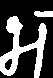

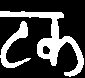

(78, 94)


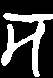

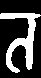

(78, 10)


(78, 184)


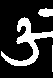

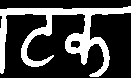

(78, 53)
0.37425149700598803
1
l
(78, 85)
0.35389133627019087
2
l
l
(78, 53)
0.30307262569832405
1
l
(78, 41)
0.30101302460202606
1
l
(78, 10)
0.18719211822660098
1
l
(78, 53)
0.19612903225806452
1
l
(78, 131)
0.3445378151260504
1
l
abccc
(92, 656)
(92, 214)


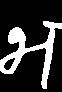

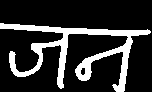

(92, 91)


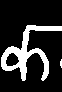

(92, 11)


(92, 159)


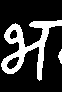

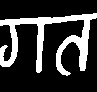

(92, 62)
0.24151436031331594
1
l
(92, 152)
0.18523153942428036
2
l
l
(92, 62)
0.18362282878411912
1
l
(92, 29)
0.2742155525238745
1
l
(92, 11)
0.14982164090368608
1
l
(92, 62)
0.2447089947089947
1
l
(92, 97)
0.20801033591731266
2
l
l
abccc
(95, 771)
(95, 163)


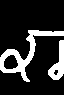

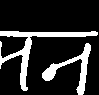

(95, 43)


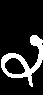

(95, 131)


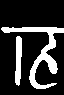

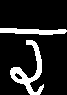

(95, 96)


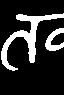

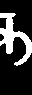

(95, 110)


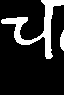

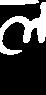

(95, 64)
0.17100371747211895
1
l
(95, 99)
0.13301088270858524
2
l
l
(95, 43)
0.14610778443113773
1
l
(95, 64)
0.2068527918781726
1
l
(95, 67)
0.12781065088757396
1
l
(95, 64)
0.17039800995024876
1
l
(95, 32)
0.24839948783610755
1
l
(95, 64)
0.14049586776859505
2
l
l
(95, 46)
0.2751677852348993
1
l
abccc
(92, 747)
(92, 104)


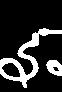

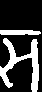

(92, 185)


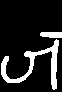

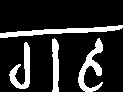

(92, 100)


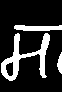

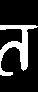

(92, 123)


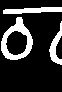

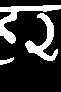

(92, 62)
0.16852540272614622
1
l
(92, 42)
0.25170998632010944
1
l
(92, 62)
0.1330166270783848
1
l
(92, 123)
0.15012106537530268
2
l
l
(92, 62)
0.19874213836477989
1
l
(92, 38)
0.1875
1
l
(92, 62)
0.173053152039555
2
l
l
(92, 61)
0.22136422136422138
2
l
l
abccc
(1, 995)
abccc
(85, 749)
(85, 177)


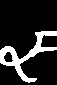

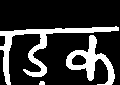

(85, 77)


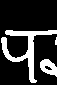

(85, 113)


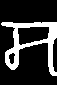

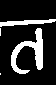

(85, 156)


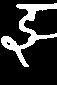

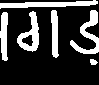

(85, 57)
0.14320096269554752
1
l
(85, 120)
0.18331226295828065
2
l
l
(85, 57)
0.1951530612244898
1
l
(85, 20)
0.27361111111111114
1
l
(85, 57)
0.21614583333333334
1
l
(85, 56)
0.16229712858926343
1
l
(85, 57)
0.18437900128040974
1
l
(85, 99)
0.35964912280701755
3
l
l
l
abccc

0


In [ ]:
# img=cv2.imread('/content/sample_data/a1.jpeg',0)
# cv2_imshow(img)
a=[]
for i in l[1:]:
  # cv2_imshow(255-i)
  img=255-i
  gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_image=255-gray_image
  prepimg, tb, lr = preprocess(gray_image)
  # cv2_imshow(prepimg)
  segments=segmentation(prepimg,255)
  l1=[]
  char_images1=[]
  for simg in segments[0]:
      # print(simg)
      # print(simg.shape)
      # simg=cv2.resize(simg,(32,32))
      # cv2_imshow(simg)
      # plt.imshow(simg)
      # k=segmentation(simg)
      # prepimg, tb, lr = preprocess(simg)
      l1.append(simg)
      # for i in k[0]:
      #   print(i.shape)
      # cv2_imshow(i for i in l[0])

      # plt.show()
  for i in l1:
    k=segmentation(i,240,2.2222,0.3333)
    # print(k[0])
    for j in k[0]:
      # print(j.shape)
      # j=cv2.resize(j,(32,32))
      # j=j.astype('float32')/255
      char_images1.append(j)
      cv2_imshow(j)
  abc=[]
  for i in char_images1:
    char_images=[]
    k=segmentation(i,255,2,0.18)
    # print(k[0])
    for j in k[0]:
      # print(j.shape)
      j=cv2.resize(j,(32,32))
      # j=j.astype('float32')/255
      char_images.append(j)
      # cv2_imshow(j)
    x=check(char_images[0])
    print(x)
    print(len(char_images))
    for i in range(len(char_images)):
      if(x>0.08 and x<1):
        abc.append(char_images[i])
        print('l')
  print('abccc')
print()
      # break
  # char_images.append(l1)
print(len(a))

11


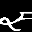

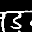

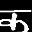

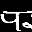

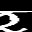

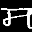

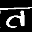

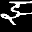

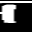

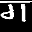

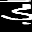

In [ ]:
print(len(a))
x_train=np.zeros((len(a),32,32),dtype=np.uint8)
for i in range(len(a)):
  # for j in range(len(char_images[i])):
  x_train[i]=a[i]
  # cv2_imshow(char_images[i])
  cv2_imshow(x_train[i])
  print(" ")
# cv2.imwrite('/content/sample_data/l.png',x_train[-1])

In [ ]:
x_train=x_train.astype('float32')/255
x_train=x_train.reshape((-1,32,32,1))

In [ ]:
model = keras.models.load_model("/content/model12.h5")

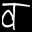

In [ ]:
x_train=np.zeros((1,32,32),dtype=np.uint8)
x_train[0]=cv2.imread('/content/drive/MyDrive/DevanagariHandwrittenCharacterDataset/Test/character_29_waw/11476.png',0)
cv2_imshow(x_train[0])

In [ ]:
y=model.predict(x_train)
print(y.argmax())

1/1 [==============================] - 1s 544ms/step
721


In [ ]:
for i in y:
  print(i.argmax(),end=' ')

30 5 8 6 7 27 19 15 14 12 18 29 16 12 18 12 17 27 

In [ ]:
di={'sp_char_27 ':'क्र','sp_char_1':'क्ल','character_3_ga':'ग​','sp_char_40':'च्य','character_36_gya':'ज्ञ','character_11_taamatar':'ट','character_8_ja':'ज','character_20_na':'न','sp_char_5':'ज्व','character_33_ha':'ह','character_19_dha':'ध','character_29_waw':'व','character_16_tabala':'त','character_7_chha':'छ​','character_24_bha':'भ​','sp_char_12':'ट्ट','sp_char_4':'ज्र','character_10_yna':'ञ','character_25_ma':'म','character_14_dhaa':'ढ​','character_15_adna':'ण','character_12_thaa':'ठ​','character_35_tra':'त्र​','character_32_patalosaw':'स','character_9_jha':'झ','character_6_cha':'च','character_4_gha':'घ​','character_23_ba':'ब','character_28_la':'ल','character_22_pha':'फ​','character_2_kha':'ख​','character_34_chhya':'क्ष','character_26_yaw':'य','character_27_ra':'र​','sp_char_36':'च्म','character_17_tha':'थ​','character_18_da':'द​','character_30_motosaw':'श','character_21_pa':'प','sp_char_37':'च्छ​','character_13_daa':'ड','character_5_kna':'ङ','character_1_ka':'क','character_31_petchiryakha':'ष'}

In [ ]:
name_2_ind={'character_10_yna': 0, 'character_11_taamatar': 1, 'character_12_thaa': 2, 'character_13_daa': 3, 'character_14_dhaa': 4, 'character_15_adna': 5, 'character_16_tabala': 6, 'character_17_tha': 7, 'character_18_da': 8, 'character_19_dha': 9, 'character_1_ka': 10, 'character_20_na': 11, 'character_21_pa': 12, 'character_22_pha': 13, 'character_23_ba': 14, 'character_24_bha': 15, 'character_25_ma': 16, 'character_26_yaw': 17, 'character_27_ra': 18, 'character_28_la': 19, 'character_29_waw': 20, 'character_2_kha': 21, 'character_30_motosaw': 22, 'character_31_petchiryakha': 23, 'character_32_patalosaw': 24, 'character_33_ha': 25, 'character_34_chhya': 26, 'character_35_tra': 27, 'character_36_gya': 28, 'character_3_ga': 29, 'character_4_gha': 30, 'character_5_kna': 31, 'character_6_cha': 32, 'character_7_chha': 33, 'character_8_ja': 34, 'character_9_jha': 35, 'sp_char_4': 36, 'sp_char_5': 37, 'sp_char_1': 38, 'sp_char_12': 39, 'sp_char_36': 40, 'sp_char_40': 41, 'sp_char_27': 42, 'sp_char_37': 43}

In [ ]:
ind_2_name={0: 'character_10_yna',
 1: 'character_11_taamatar',
 2: 'character_12_thaa',
 3: 'character_13_daa',
 4: 'character_14_dhaa',
 5: 'character_15_adna',
 6: 'character_16_tabala',
 7: 'character_17_tha',
 8: 'character_18_da',
 9: 'character_19_dha',
 10: 'character_1_ka',
 11: 'character_20_na',
 12: 'character_21_pa',
 13: 'character_22_pha',
 14: 'character_23_ba',
 15: 'character_24_bha',
 16: 'character_25_ma',
 17: 'character_26_yaw',
 18: 'character_27_ra',
 19: 'character_28_la',
 20: 'character_29_waw',
 21: 'character_2_kha',
 22: 'character_30_motosaw',
 23: 'character_31_petchiryakha',
 24: 'character_32_patalosaw',
 25: 'character_33_ha',
 26: 'character_34_chhya',
 27: 'character_35_tra',
 28: 'character_36_gya',
 29: 'character_3_ga',
 30: 'character_4_gha',
 31: 'character_5_kna',
 32: 'character_6_cha',
 33: 'character_7_chha',
 34: 'character_8_ja',
 35: 'character_9_jha',
 36: 'sp_char_4',
 37: 'sp_char_5',
 38: 'sp_char_1',
 39: 'sp_char_12',
 40: 'sp_char_36',
 41: 'sp_char_40',
 42: 'sp_char_27',
 43: 'sp_char_37'}


In [ ]:
for i in range(len(y)):
  # print(y[i].argmax(),end=' ')
  # if i==0 or i==2 or i==6:
  #   # if i==4:
  #   #  print(' ') 
    # continue 
  print(di[ind_2_name[y[i].argmax()]],end=' ')

In [ ]:
# di[ind_2_name[26]]